In [477]:
from numpy import *
from math import log
import operator
import pickle


def SE(data):
    m = len(data)
    dictt = {}
    for x in data:
        label = x[-1]
        dictt[label] = dictt.get(label, 0) + 1
    se = 0.0
    print dictt
    for key in dictt:
        p = float(dictt[key]) / m
        se -= p * log(p, 2)
    return se

def createData():
    data = ([[1, 1,'Y'],
             [1, 1,'Y'],
             [1, 0,'N'],
             [0, 1,'N'],
             [0, 1,'N']])
    labels = ['NS', 'FS']
    return data, labels

def splitdata(data, index, value):
    result = []
    for x in data:
        if x[index] == value:
            temp = x[:index]
            temp.extend(x[index+1:])
            result.append(temp)
    return result

def BF(data):
    n = len(data[0]) - 1
    be = SE(data)
    big = 0.0
    bf = -1
    for i in xrange(n):
        fl = [x[i] for x in data]
        uv = set(fl)
        ne = 0.0
        for value in uv:
            sd = splitdata(data, i, value)
            p = len(sd) / float(len(data))
            ne += p * SE(sd)
        ig = be - ne
        if ig > big:
            big = ig
            bf = i
    return bf

def DT(data, labels):
    y = [x[-1] for x in data]
    if len(data[0]) == 1:
        return maxl(y)
    if y.count(y[0]) == len(y):
        return y[0]
    bf = BF(data)
    bl = labels[bf]
    del(labels[bf])
    tree = {bl:{}}
    
    fl = [x[bf] for x in data]
    uv = set(fl)
    for value in uv:
        tree[bl][value] = DT(splitdata(data, bf, value), labels[:])
        
    return tree

def maxl(y):
    dictt = {}
    for value in y:
        dictt[value] = dictt.get(value, 0) + 1
    result = sorted(dictt.iteritems(), key= operator.itemgetter(1), reverse=True)
    return result[0][0]

def classify(tree, labels, x):
    #取得根节点
    root = tree.keys()[0]
    #取得根节点在x中对应的值
    value = x[labels.index(root)]
    #取得根节点子树（可能有若干个）
    subtree = tree[root]
    #判断每一个分支
    for key in subtree.keys():
        if value == key:
            if isinstance(subtree[key], dict):
                label = classify(subtree[key], labels, x)
            else:
                label = subtree[key]         
    return label

def storeTree(inputTree,filename):
    fw = open(filename,'w')
    pickle.dump(inputTree,fw)
    fw.close()
    
def grabTree(filename):
    import pickle
    fr = open(filename)
    return pickle.load(fr)  

{'Y': 2, 'N': 3}
{'N': 2}
{'Y': 2, 'N': 1}
{'N': 1}
{'Y': 2, 'N': 2}
{'Y': 2, 'N': 1}
{'N': 1}
{'Y': 2}


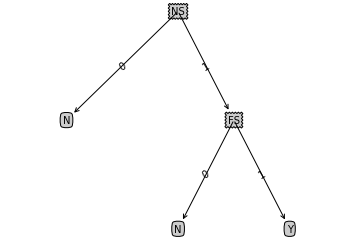

{'NS': {0: 'N', 1: {'FS': {0: 'N', 1: 'Y'}}}}
['NS']
['FS']


In [478]:
data, label = createData()
tree = DT(data, label)
createPlot(tree)
print tree
print tree.keys()
print label

In [458]:
import pandas as pd
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
X = pd.DataFrame(lenses)
print X
label = ['A', 'B', 'C', 'D']

             0      1    2        3          4
0        young  myope   no  reduced  no lenses
1        young  myope   no   normal       soft
2        young  myope  yes  reduced  no lenses
3        young  myope  yes   normal       hard
4        young  hyper   no  reduced  no lenses
5        young  hyper   no   normal       soft
6        young  hyper  yes  reduced  no lenses
7        young  hyper  yes   normal       hard
8          pre  myope   no  reduced  no lenses
9          pre  myope   no   normal       soft
10         pre  myope  yes  reduced  no lenses
11         pre  myope  yes   normal       hard
12         pre  hyper   no  reduced  no lenses
13         pre  hyper   no   normal       soft
14         pre  hyper  yes  reduced  no lenses
15         pre  hyper  yes   normal  no lenses
16  presbyopic  myope   no  reduced  no lenses
17  presbyopic  myope   no   normal  no lenses
18  presbyopic  myope  yes  reduced  no lenses
19  presbyopic  myope  yes   normal       hard
20  presbyopi

{'no lenses': 15, 'hard': 4, 'soft': 5}
{'no lenses': 5, 'hard': 1, 'soft': 2}
{'no lenses': 6, 'hard': 1, 'soft': 1}
{'no lenses': 4, 'hard': 2, 'soft': 2}
{'no lenses': 8, 'hard': 1, 'soft': 3}
{'no lenses': 7, 'hard': 3, 'soft': 2}
{'no lenses': 8, 'hard': 4}
{'no lenses': 7, 'soft': 5}
{'no lenses': 12}
{'no lenses': 3, 'hard': 4, 'soft': 5}
{'no lenses': 3, 'hard': 4, 'soft': 5}
{'no lenses': 1, 'hard': 1, 'soft': 2}
{'no lenses': 2, 'hard': 1, 'soft': 1}
{'hard': 2, 'soft': 2}
{'no lenses': 2, 'hard': 1, 'soft': 3}
{'no lenses': 1, 'hard': 3, 'soft': 2}
{'no lenses': 2, 'hard': 4}
{'no lenses': 1, 'soft': 5}
{'no lenses': 2, 'hard': 4}
{'no lenses': 1, 'hard': 1}
{'no lenses': 1, 'hard': 1}
{'hard': 2}
{'no lenses': 2, 'hard': 1}
{'hard': 3}
{'no lenses': 2, 'hard': 1}
{'no lenses': 1}
{'no lenses': 1}
{'hard': 1}
{'no lenses': 1, 'soft': 5}
{'soft': 2}
{'no lenses': 1, 'soft': 1}
{'soft': 2}
{'soft': 3}
{'no lenses': 1, 'soft': 2}
{'no lenses': 1, 'soft': 1}
{'soft': 1}
{'no len

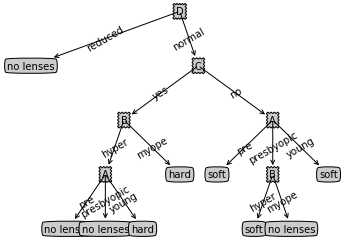

In [445]:
lensesTree = DT(lenses, label)
createPlot(lensesTree)

In [461]:
from  math  import log

In [462]:
log(5,2)

2.321928094887362